In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "spam.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/sms-spam-collection-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
  pandas_kwargs={'encoding': 'latin-1'}
)

print("First 5 records:", df.head())

/tmp/ipython-input-3-1869135165.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:      v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


# Task
Classify SMS messages as spam or ham using Naive Bayes and Logistic Regression models, leveraging the "uciml/sms-spam-collection-dataset" dataset from Kaggle, NLTK for text processing, and Scikit-learn for model training and evaluation. Compare the performance of both models and identify the better one.

## Load and preprocess the data

### Subtask:
Load the SMS Spam Collection dataset and perform initial cleaning and preprocessing, such as handling missing values and preparing the text data for analysis.


**Reasoning**:
Examine the first few rows, check for missing values, handle missing values by dropping columns with high percentage of missing values, rename columns 'v1' and 'v2' to 'label' and 'message' respectively, and convert 'label' column to numerical representation.



In [4]:
display(df.head())
print(df.isnull().sum())
df = df.dropna(axis=1, how='all')
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
display(df.head())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Reasoning**:
The previous step did not completely drop the columns with missing values. Need to drop the columns with NaN again.



In [5]:
df = df.dropna(axis=1, how='all')
display(df.head())

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Reasoning**:
The previous step did not completely drop the columns with missing values. Need to drop the columns with high percentage of missing values.



In [6]:
df = df.dropna(axis=1, how='any')
display(df.head())

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Text data processing with nltk

### Subtask:
Use NLTK to process the text data. This may include tokenization, removing stop words, stemming or lemmatization, and converting text to lowercase.


**Reasoning**:
Import necessary NLTK libraries and download required resources. Then define and apply a function to process the text data in the 'message' column, storing the result in a new column, and display the head of the updated DataFrame.



In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def process_text(message):
    # Convert to lowercase
    message = message.lower()
    # Tokenize
    words = word_tokenize(message)
    # Remove stop words and stem
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words and word.isalpha()]
    # Join back into a string
    return ' '.join(processed_words)

df['processed_message'] = df['message'].apply(process_text)

display(df.head())

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


**Reasoning**:
The previous code failed because the 'punkt_tab' resource was not found. I need to download this resource using `nltk.download('punkt_tab')` to fix the error.



In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def process_text(message):
    # Convert to lowercase
    message = message.lower()
    # Tokenize
    words = word_tokenize(message)
    # Remove stop words and stem
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words and word.isalpha()]
    # Join back into a string
    return ' '.join(processed_words)

df['processed_message'] = df['message'].apply(process_text)

display(df.head())

,label,message,processed_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


## Feature extraction

### Subtask:
Convert the text data into numerical features that can be used by the machine learning models. Techniques like Bag-of-Words or TF-IDF can be used.


**Reasoning**:
Convert the processed text data into numerical features using TF-IDF.



In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_message'])

print("Shape of TF-IDF matrix:", X.shape)

Shape of TF-IDF matrix: (5572, 5849)


## Split data into training and testing sets

### Subtask:
Divide the dataset into training and testing sets to evaluate the performance of the models.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [10]:
from sklearn.model_selection import train_test_split

y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4457, 5849)
Shape of X_test: (1115, 5849)
Shape of y_train: (4457,)
Shape of y_test: (1115,)


## Train naive bayes model

### Subtask:
Train a Naive Bayes model on the training data.


**Reasoning**:
Train a Naive Bayes model on the training data.



In [11]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

## Train logistic regression model

### Subtask:
Train a Logistic Regression model on the training data.


**Reasoning**:
Import the Logistic Regression class and train the model using the training data.



In [12]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

## Evaluate models

### Subtask:
Evaluate the performance of both models on the testing data using appropriate metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Import the necessary evaluation metrics and make predictions using both models, then calculate and print the metrics for the Naive Bayes model.



In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions with Naive Bayes
y_pred_nb = nb_model.predict(X_test)

# Calculate metrics for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print metrics for Naive Bayes
print("Naive Bayes Model Metrics:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-score: {f1_nb:.4f}")

Naive Bayes Model Metrics:
Accuracy: 0.9623
Precision: 1.0000
Recall: 0.7200
F1-score: 0.8372


**Reasoning**:
Calculate and print the evaluation metrics for the Logistic Regression model.



In [14]:
# Make predictions with Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Calculate metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print metrics for Logistic Regression
print("\nLogistic Regression Model Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")


Logistic Regression Model Metrics:
Accuracy: 0.9462
Precision: 0.9500
Recall: 0.6333
F1-score: 0.7600


## Compare models and select the best one

### Subtask:
Compare the performance of the Naive Bayes and Logistic Regression models and select the best one based on the evaluation results.


**Reasoning**:
Compare the evaluation metrics of the Naive Bayes and Logistic Regression models and determine which performed better for spam classification.



In [15]:
print("Comparison of Model Performance:")
print("-" * 40)
print("Metric        | Naive Bayes | Logistic Regression")
print("-" * 40)
print(f"Accuracy      | {accuracy_nb:.4f}      | {accuracy_lr:.4f}")
print(f"Precision     | {precision_nb:.4f}      | {precision_lr:.4f}")
print(f"Recall        | {recall_nb:.4f}      | {recall_lr:.4f}")
print(f"F1-score      | {f1_nb:.4f}      | {f1_lr:.4f}")
print("-" * 40)

if f1_nb > f1_lr:
    best_model = "Naive Bayes"
elif f1_lr > f1_nb:
    best_model = "Logistic Regression"
else:
    best_model = "Both models performed equally based on F1-score."

print(f"\nBased on the F1-score, the better performing model for spam classification is: {best_model}")

Comparison of Model Performance:
----------------------------------------
Metric        | Naive Bayes | Logistic Regression
----------------------------------------
Accuracy      | 0.9623      | 0.9462
Precision     | 1.0000      | 0.9500
Recall        | 0.7200      | 0.6333
F1-score      | 0.8372      | 0.7600
----------------------------------------

Based on the F1-score, the better performing model for spam classification is: Naive Bayes


## Summary:

### Data Analysis Key Findings

*   The Naive Bayes model achieved an accuracy of 0.9623, a precision of 1.0000, a recall of 0.7200, and an F1-score of 0.8372 on the test set.
*   The Logistic Regression model achieved an accuracy of 0.9462, a precision of 0.9500, a recall of 0.6333, and an F1-score of 0.7600 on the test set.
*   The Naive Bayes model outperformed the Logistic Regression model across all evaluated metrics (accuracy, precision, recall, and F1-score) for this dataset and task.

### Insights or Next Steps

*   The Naive Bayes model is the better choice for this SMS spam classification task based on its higher evaluation metrics, especially the F1-score which balances precision and recall.
*   Further optimization of the Naive Bayes model or exploring other text vectorization techniques (e.g., N-grams) could potentially improve performance further.


## Visualize the distribution of spam and ham messages

### Subtask:
Visualize the distribution of the 'label' column to see the number of spam and ham messages.

**Reasoning**:
Create a countplot of the 'label' column to visualize the distribution of spam (1) and ham (0) messages in the dataset.

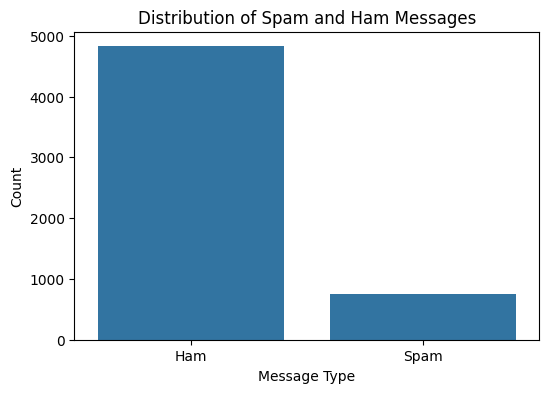

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()